In [1]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# read the CSV files into DataFrames and perform any necessary data cleaning steps

csv_path = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/whale_returns.csv")
csv_path1 = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/algo_returns.csv")
csv_path2 = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/sp_tsx_history.csv")

whale_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(csv_path1, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df = pd.read_csv(csv_path2, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [3]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [8]:
# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls then Drop nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# then Drop nulls
algo_df = algo_df.dropna()
# Confirm dropped nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_df = sp_df.rename(columns={"Close": "Daily Returns"})

In [14]:
# Take away $ and ,
sp_df["Daily Returns"] = sp_df["Daily Returns"].str.replace("$","")
sp_df["Daily Returns"] = sp_df["Daily Returns"].str.replace(",","")
sp_df["Daily Returns"].head()

C:\Users\yauwa\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Daily Returns, dtype: object

In [15]:
# Drop nulls
sp_df.dropna()
sp_df.isnull().sum()

Daily Returns    0
dtype: int64

In [16]:
# Calculate Daily Returns
sp_df["Daily Returns"] = sp_df["Daily Returns"].astype('float')
sp_df["Daily Returns"]
sp_df["Daily Returns"] = sp_df["Daily Returns"].pct_change()
sp_df["Daily Returns"].head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Daily Returns, dtype: float64

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)
# Display a few rows
combined_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

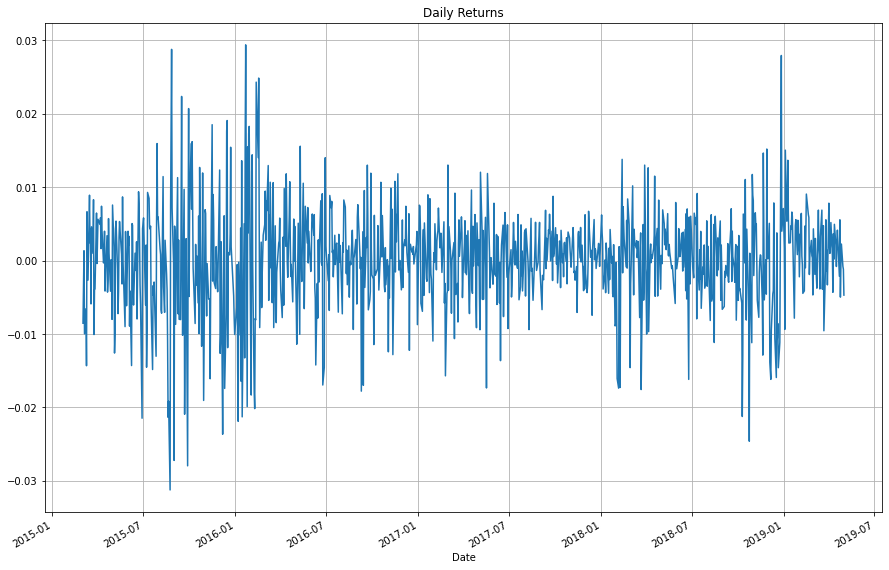

In [18]:
# Plot daily returns of all portfolios
combined_df["Daily Returns"].plot(figsize=(15, 10), title="Daily Returns", grid=True)

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

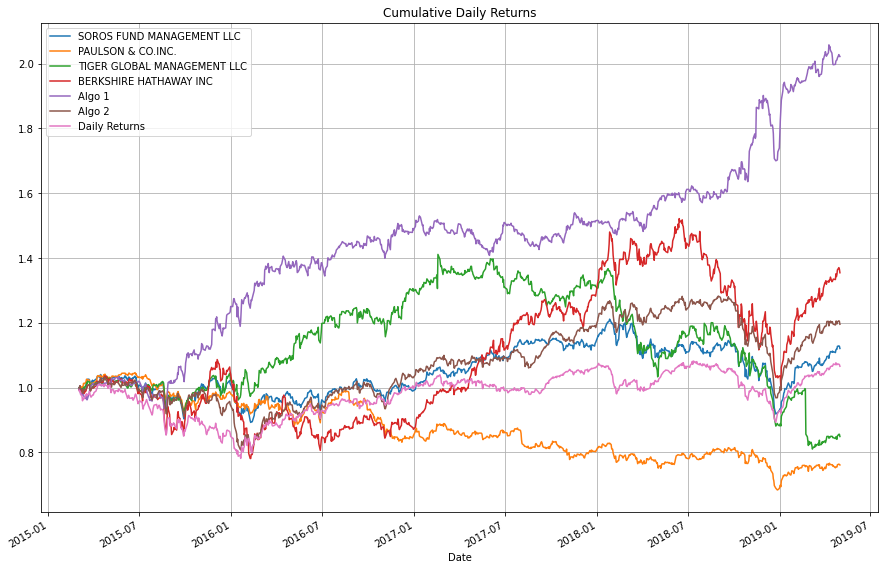

In [20]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)

<AxesSubplot:>

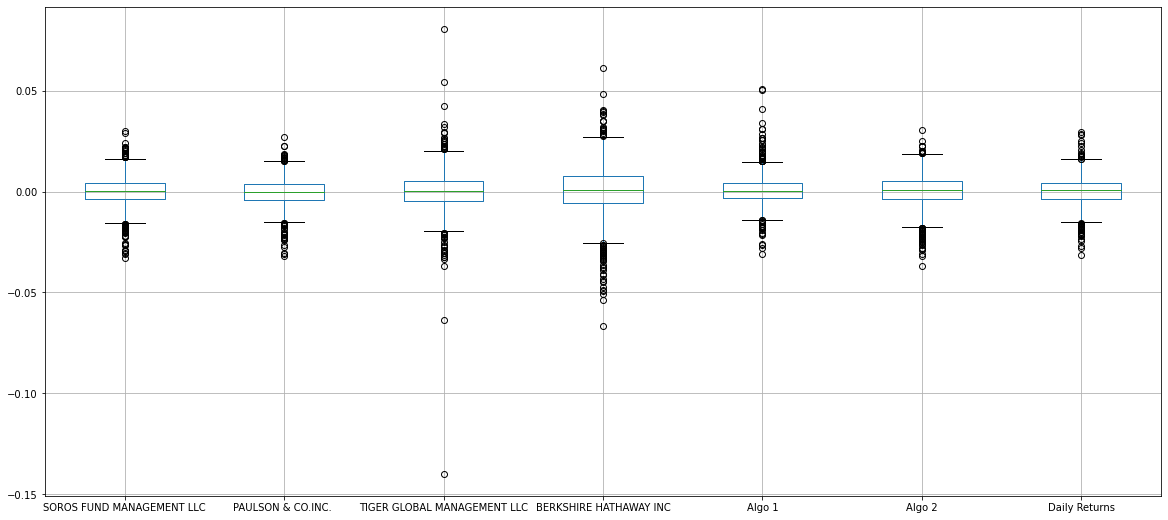

In [21]:
# Risk Analysis
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,9))

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Daily Returns                  0.007034
dtype: float64

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_df.std()

Daily Returns    0.006637
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
sp_df.std()

Daily Returns    0.006637
dtype: float64

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

In [26]:
# Rolling Statistics
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_std_rolling = combined_df.rolling(window=21).std()
combined_df_std_rolling = combined_df_std_rolling.dropna()

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

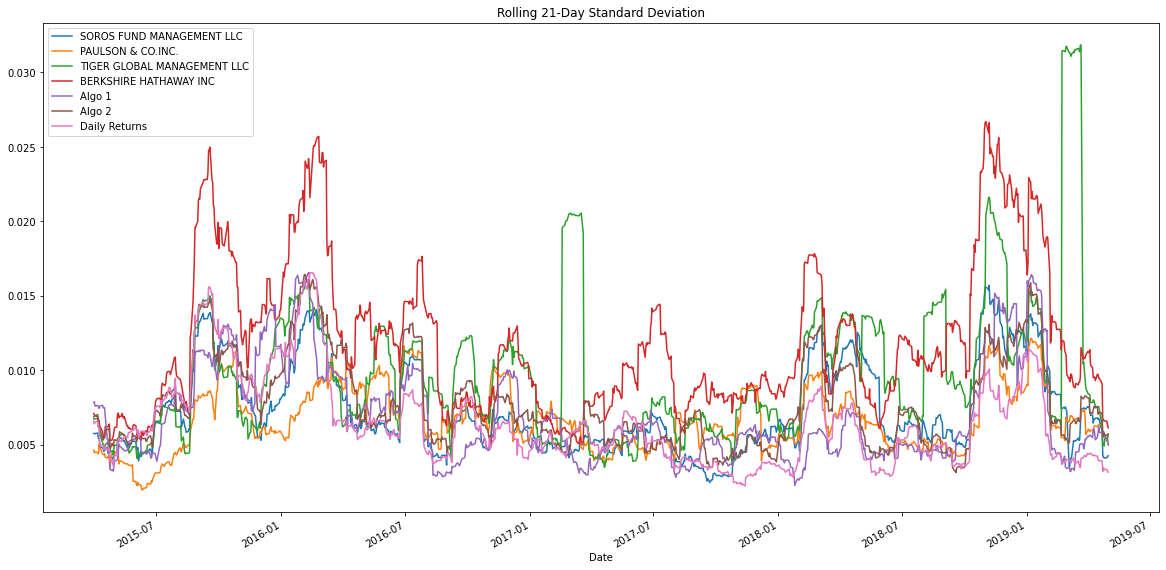

In [27]:
# Plot the rolling standard deviation
combined_df_std_rolling.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation")

In [28]:
# Calculate the correlation
combined_df_correlation = combined_df.corr()
# Display de correlation matrix
combined_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Daily Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

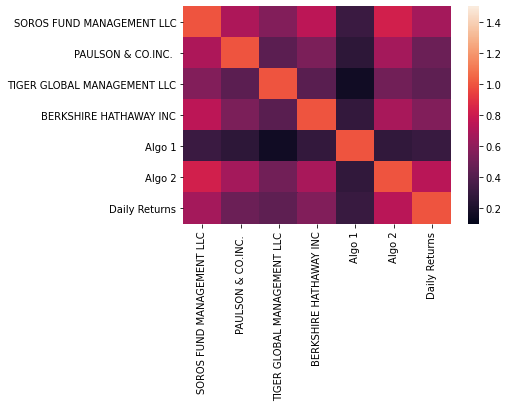

In [29]:
# Plot correlation using a seaborn heatmap
sns.heatmap(combined_df_correlation, vmin=0.1, vmax=1.5)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 vs S&P TSX'}, xlabel='Date'>

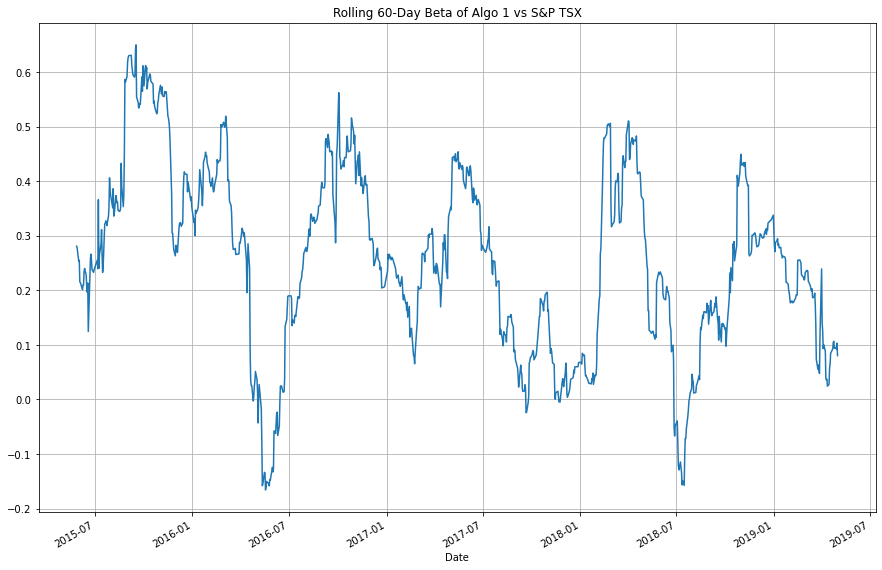

In [30]:
# Calculate covariance of the algorothmic data
algo_df_covariance = combined_df["Algo 1"].cov(combined_df["Daily Returns"])
algo_df_rolling_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["Daily Returns"])
# Calculate variance of S&P TSX
sp_df_variance = sp_df["Daily Returns"].var()
algo_df_variance = combined_df["Algo 1"].var()
sp_df_rolling_variance = combined_df["Algo 1"].rolling(window=60).var()
algo_df_rolling_variance = combined_df["Daily Returns"].rolling(window=60).var()
# Computing beta & rolling beta using algo covariance divided by S&P variance
algo_beta = algo_df_covariance / sp_df_variance
algo_rolling_beta = algo_df_rolling_covariance / sp_df_rolling_variance
# Plot beta trend
algo_rolling_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of Algo 1 vs S&P TSX', grid=True)

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average From All Portfolios - 21 day'}, xlabel='Date'>

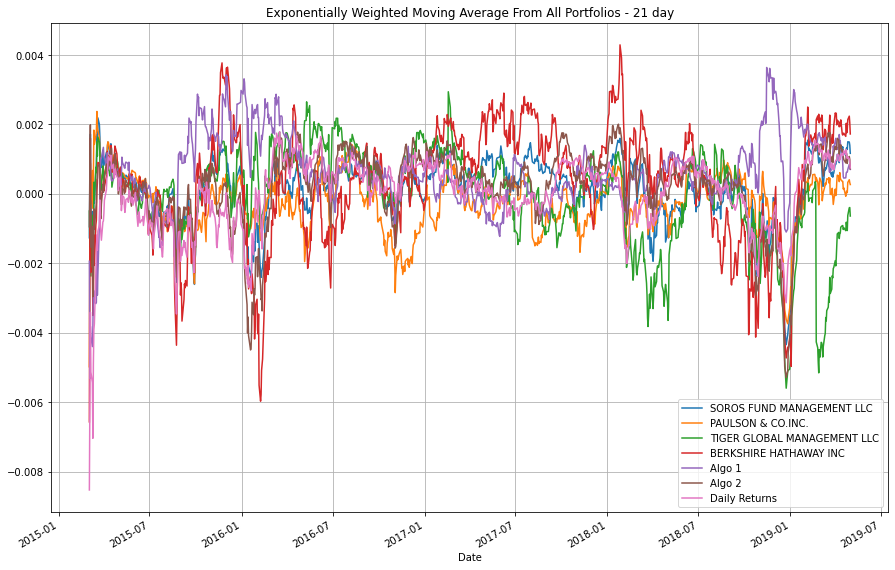

In [31]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = combined_df.ewm(halflife=21).mean()
portfolio_ewm.plot(figsize=(15, 10), title='Exponentially Weighted Moving Average From All Portfolios - 21 day', grid=True)

In [32]:
# Sharpe Ratios
# Annualized Sharpe Ratios
annual_sharpe_ratios = (combined_df.mean() * 252) / annualized_std
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Daily Returns                  0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualised Sharpe Ratio'}>

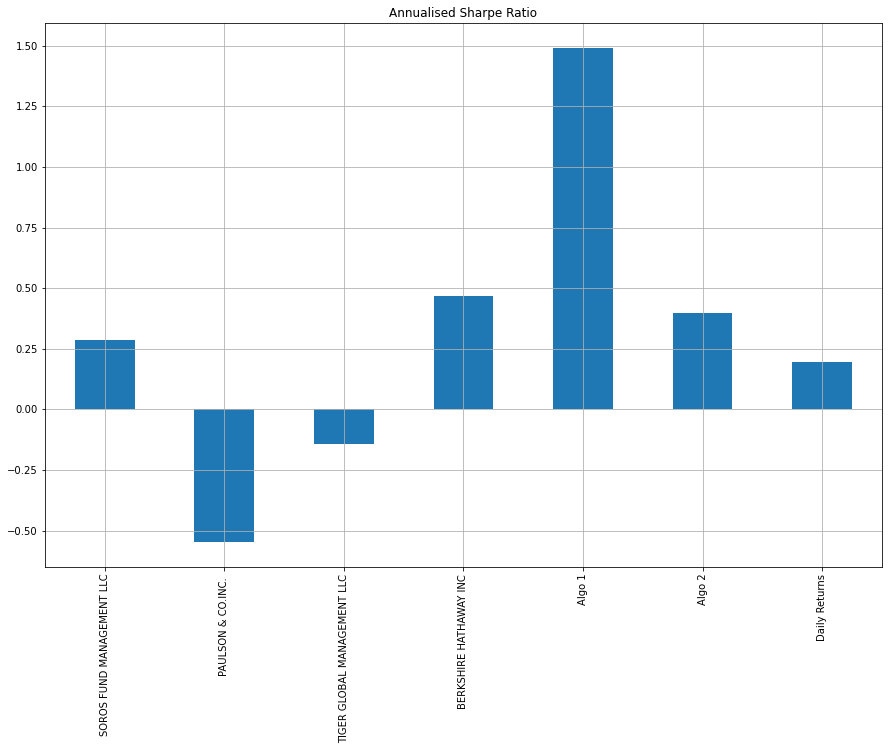

In [33]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(figsize=(15, 10), title="Annualised Sharpe Ratio", grid=True)

In [35]:
## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
# Reading data from 1st stock

l_csv_path = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/l_historical.csv")
l_df = pd.read_csv(l_csv_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
l_df = l_df.drop(["Symbol"], axis=1)

In [36]:
# Rename column for when it is merged with other dataframes
l_df = l_df.rename(columns = {"Close":"L"})

In [37]:
# Reading data from 2nd stock
otex_csv_path = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
otex_df = otex_df.drop(["Symbol"], axis=1)

In [38]:
# Rename column for when it is merged with other dataframes
otex_df = otex_df.rename(columns = {"Close":"OTEX"})


In [39]:
# Reading data from 3rd stock
shop_csv_path = Path("../../../Homework/Week 4/Instructions/Starter_Code/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
shop_df = shop_df.drop(["Symbol"], axis=1)

In [40]:
# Rename column for when it is merged with other dataframes
shop_df = shop_df.rename(columns = {"Close":"SHOP"})

In [41]:
# Combine all stocks in a single DataFrame
all_dfs = pd.concat([shop_df, l_df, otex_df], axis="columns", join="inner")
all_dfs = all_dfs.sort_index()
all_dfs.head()

,SHOP,L,OTEX
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [42]:

#CALCULATE DAILY RETURNS 
all_dfs = all_dfs.pct_change()

# Drop NAs
all_dfs = all_dfs.dropna()

# Display sample data
all_dfs.head()

,SHOP,L,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = all_dfs.dot(weights)

# Display sample data
my_portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [45]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([all_dfs, my_portfolio_returns,], axis="columns", join="inner")
portfolio_returns.columns = (["L", "OTEX", "SHOP", "Weighted Portfolio"]) 
portfolio_returns.head()

,L,OTEX,SHOP,Weighted Portfolio
Date,,,,
2018-01-03,0.023398,-0.010002,-0.011703,0.000565
2018-01-04,0.017092,0.000174,-0.003715,0.004517
2018-01-05,-0.001455,0.000000,-0.007924,-0.003126
2018-01-08,0.016392,-0.009753,-0.009631,-0.000997
2018-01-09,-0.011254,0.008969,-0.000712,-0.000999


In [46]:
# Only compare dates where return data exists for all the stocks (drop Nulls)
portfolio_returns.dropna
portfolio_returns.isnull().sum()

L                     0
OTEX                  0
SHOP                  0
Weighted Portfolio    0
dtype: int64

In [47]:
portfolio_returns.dtypes

L                     float64
OTEX                  float64
SHOP                  float64
Weighted Portfolio    float64
dtype: object

In [48]:
#  Re-run the risk analysis with your portfolio to see how it compares to the others
# Calculate the Annualized Standard Deviation
# Calculate the annualized `std`
stock_1y_std = portfolio_returns.std() * np.sqrt(252)
stock_1y_std

L                     0.488717
OTEX                  0.152369
SHOP                  0.215132
Weighted Portfolio    0.216794
dtype: float64

In [49]:
# Calculate rolling standard deviation
portfolio_returns_std_rolling = portfolio_returns.rolling(window=21).std()
portfolio_returns_std_rolling = portfolio_returns_std_rolling.dropna()
# Plot rolling standard deviation
portfolio_returns_std_rolling

,L,OTEX,SHOP,Weighted Portfolio
Date,,,,
2018-01-31,0.019085,0.009422,0.005697,0.007853
2018-02-01,0.019344,0.009874,0.028489,0.010253
2018-02-02,0.019206,0.009932,0.030516,0.011107
2018-02-05,0.021719,0.009921,0.030508,0.011826
2018-02-06,0.021984,0.009767,0.030546,0.011816
...,...,...,...,...
2019-12-20,0.023773,0.007647,0.009358,0.009185
2019-12-23,0.023754,0.007651,0.009868,0.009339
2019-12-24,0.024038,0.007416,0.009104,0.009177


<AxesSubplot:>

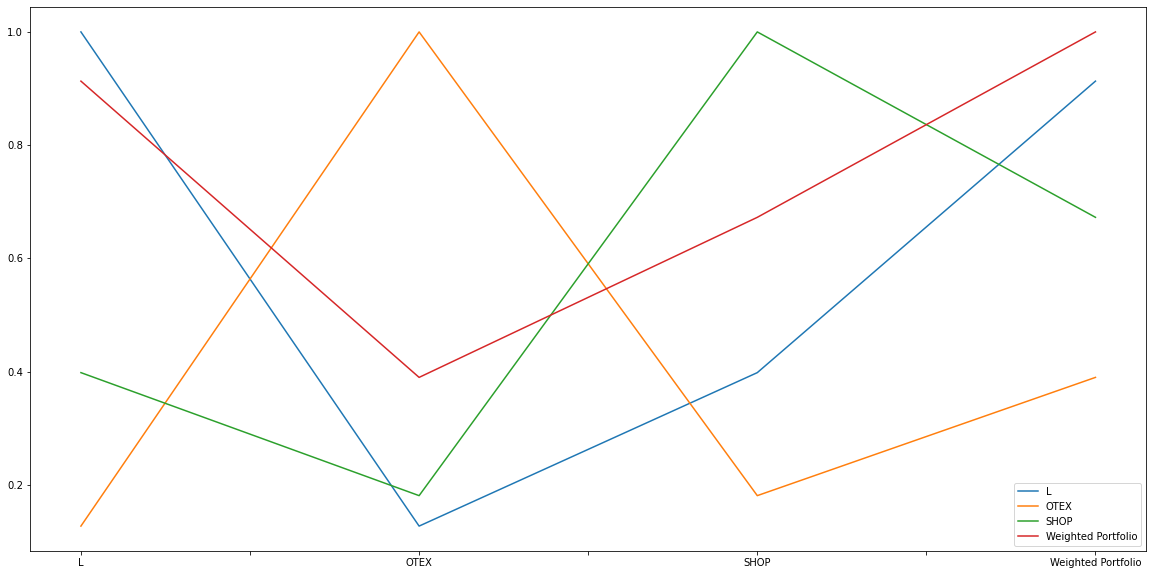

In [50]:
# Calculate and plot the correlation
portfolio_returns_correlation = portfolio_returns.corr()
portfolio_returns_correlation.plot(figsize=(20,10))

<AxesSubplot:>

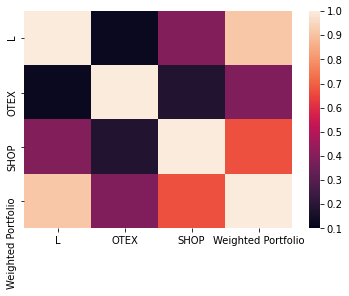

In [51]:
# Use seaborn to plot a heatmap of the correlation
sns.heatmap(portfolio_returns_correlation, vmin=0.1, vmax=1)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Weighted portfolio'}, xlabel='Date'>

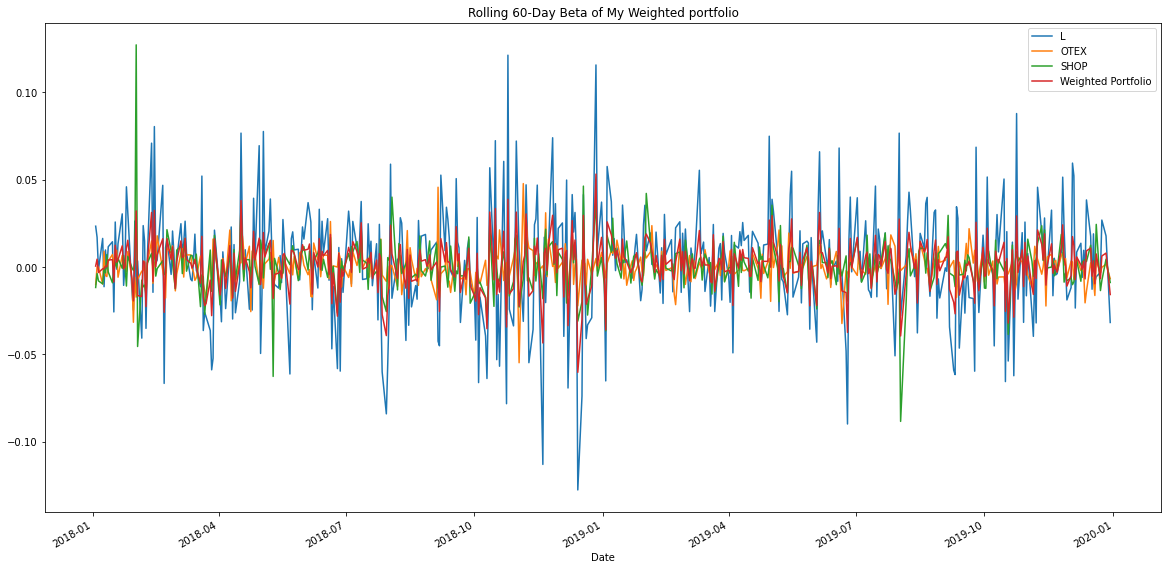

In [54]:
# Calculate and plot Beta
portfolio_rolling_covariance = portfolio_returns.rolling(window=60).cov(combined_df["Daily Returns"])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')
# Calculate 60-day rolling variance of the portfolio vs. S&P and plot the data
portfolio_rolling_variance = portfolio_returns.rolling(window=60).var()

# Computing beta & rolling beta using rolling covariance divided by rolling variance
portfolio_rolling_beta = portfolio_rolling_covariance / portfolio_rolling_variance
portfolio_returns.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Weighted portfolio')

In [55]:
# Calculate Annualzied Sharpe Ratios
new_ann_sharpe_ratios = (my_portfolio_returns.mean() * 252) / stock_1y_std 
new_ann_sharpe_ratios

L                     0.720181
OTEX                  2.309952
SHOP                  1.636037
Weighted Portfolio    1.623501
dtype: float64

<AxesSubplot:>

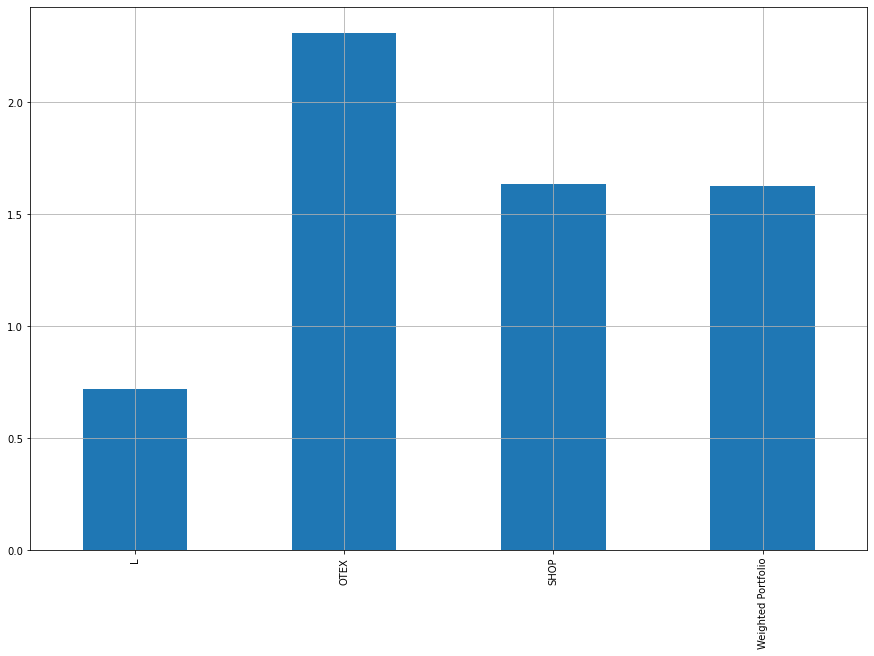

In [56]:
# Visualize the sharpe ratios as a bar plot
new_ann_sharpe_ratios.plot.bar(figsize=(15,10), grid=True)

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

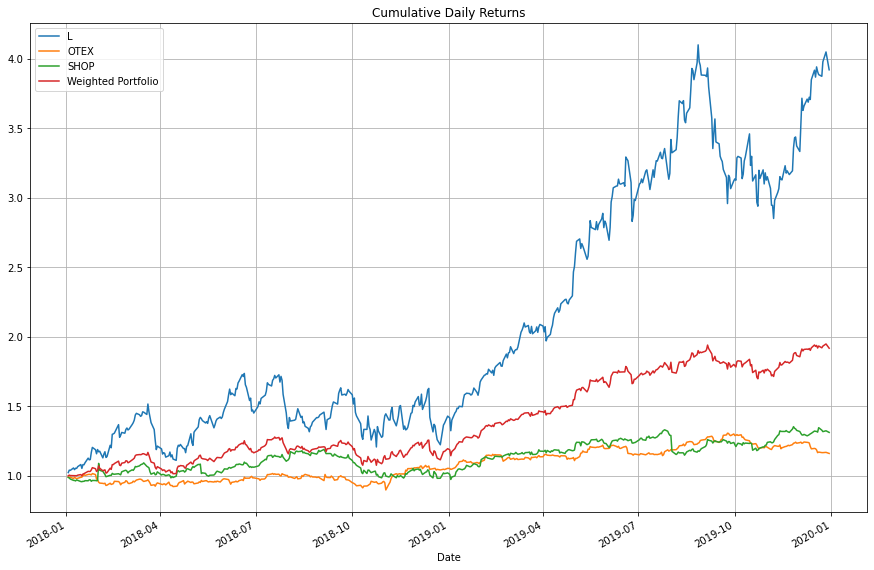

In [57]:
# Calculate and plot cumulative returns for the new_portfolio_returns
new_cumulative_returns = (1 + portfolio_returns).cumprod()
new_cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)

In [ ]:
# How does your portfolio do?

# Any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent. In this case L stock has the most return of investment but higher risk from 2018 to 2020
# SHOP and OTEX has a slow and steady growth in these 2 years therefore it is safer to invest in. 
The weight portfolio gave us a balance combination betwwen the 3 stocks i picked. Getting 1.6 in sharpe ratio with any increasing return over 2 years.